# PREPROCESSING ON STUDENT.csv DATA
#lets do preprocessing :-



In [966]:
import numpy as np;
import pandas as pd;
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 

df=pd.read_csv("student.csv");

# Attributes for both student-mat.csv (Math course) dataset:

1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)


2 sex - student's sex (binary: "F" - female or "M" - male)


3 age - student's age (numeric: from 15 to 22)


4 address - student's home address type (binary: "U" - urban or "R" - rural)


5 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)


6 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)


7 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)


8 failures - number of past class failures (numeric: n if 1<=n<3, else 4)


9 activities - extra-curricular activities (binary: yes or no)


10 nursery - attended nursery school (binary: yes or no)


11 higher - wants to take higher education (binary: yes or no)


12 freetime - free time after school (numeric: from 1 - very low to 5 - very high)


13 goout - going out with friends (numeric: from 1 - very low to 5 - very high)


14 health - current health status (numeric: from 1 - very bad to 5 - very good)


15 absences - number of school absences (numeric: from 0 to 93)

# these grades are related with the course subject - Math:


16 G1 - first period grade (numeric: from 0 to 20)


17 G2 - second period grade (numeric: from 0 to 20)


18 G3 - final grade (numeric: from 0 to 20, output target)

In [967]:
df.head(10)


,school,sex,age,address,Medu,Fedu,studytime,failures,activities,nursery,higher,freetime,goout,health,absences,G1,G2,G3
0,GP,F,18.0,U,4,4,2,0,no,yes,yes,3,4,3,6,5,6,6
1,GP,F,17.0,U,1,1,2,0,no,no,yes,3,3,3,4,5,5,6
2,GP,F,15.0,U,1,1,2,3,no,yes,yes,3,2,3,10,7,8,10
3,GP,F,15.0,U,4,2,3,0,yes,yes,yes,2,2,5,2,15,14,15
4,GP,F,16.0,U,3,3,2,0,no,yes,yes,3,2,5,4,6,10,10
5,GP,M,16.0,U,4,3,2,0,yes,yes,yes,4,2,5,10,15,15,15
6,GP,M,16.0,U,2,2,2,0,no,yes,yes,4,4,3,0,12,12,11
7,GP,F,17.0,U,4,4,2,0,no,yes,yes,1,4,1,6,6,5,6
8,GP,M,15.0,U,3,2,2,0,no,yes,yes,2,2,1,0,16,18,19
9,GP,M,15.0,U,3,4,2,0,yes,yes,yes,5,1,5,0,14,15,15


In [968]:
df.describe()


,age,Medu,Fedu,studytime,failures,freetime,goout,health,absences,G1,G2,G3
count,380.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.705263,2.749367,2.521519,2.035443,0.334177,3.235443,3.108861,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.277974,1.094735,1.088201,0.839240,0.743651,0.998862,1.113278,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,2.000000,0.000000,3.000000,3.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,0.000000,4.000000,4.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [969]:
df.isna().sum()

school         0
sex            0
age           15
address        0
Medu           0
Fedu           0
studytime      0
failures       0
activities     0
nursery        0
higher         0
freetime       0
goout          0
health         0
absences       0
G1             0
G2             0
G3             0
dtype: int64

In [970]:
df.school.unique()


array(['GP', 'MS'], dtype=object)

In [971]:
df.sex.unique()

array(['F', 'M'], dtype=object)

In [972]:
df.age.unique()

array([18., 17., 15., 16., nan, 19., 22., 20., 21.])

In [973]:
print(df.age.mean())
print(df.age.median())

16.705263157894738
17.0


In [974]:
df["age"].fillna(df["age"].mean(),inplace=True)

### putting the mean age to the place where there was NAN because its given that age can be in between 15 to 22


In [975]:
df.isna().sum()

school        0
sex           0
age           0
address       0
Medu          0
Fedu          0
studytime     0
failures      0
activities    0
nursery       0
higher        0
freetime      0
goout         0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [976]:
df['avg of G1 & G2 again'] = df[['G1','G2']].mean(axis=1)
df.head(10)



,school,sex,age,address,Medu,Fedu,studytime,failures,activities,nursery,higher,freetime,goout,health,absences,G1,G2,G3,avg of G1 & G2 again
0,GP,F,18.0,U,4,4,2,0,no,yes,yes,3,4,3,6,5,6,6,5.5
1,GP,F,17.0,U,1,1,2,0,no,no,yes,3,3,3,4,5,5,6,5.0
2,GP,F,15.0,U,1,1,2,3,no,yes,yes,3,2,3,10,7,8,10,7.5
3,GP,F,15.0,U,4,2,3,0,yes,yes,yes,2,2,5,2,15,14,15,14.5
4,GP,F,16.0,U,3,3,2,0,no,yes,yes,3,2,5,4,6,10,10,8.0
5,GP,M,16.0,U,4,3,2,0,yes,yes,yes,4,2,5,10,15,15,15,15.0
6,GP,M,16.0,U,2,2,2,0,no,yes,yes,4,4,3,0,12,12,11,12.0
7,GP,F,17.0,U,4,4,2,0,no,yes,yes,1,4,1,6,6,5,6,5.5
8,GP,M,15.0,U,3,2,2,0,no,yes,yes,2,2,1,0,16,18,19,17.0
9,GP,M,15.0,U,3,4,2,0,yes,yes,yes,5,1,5,0,14,15,15,14.5


In [684]:


del df['avg of G1 and G2']

KeyError: 'avg of G1 and G2'

In [801]:
df.head(10)

,school,sex,age,address,Medu,Fedu,studytime,failures,activities,nursery,higher,freetime,goout,health,absences,G1,G2,G3,avg of G1 & G2 again
0,GP,F,18.0,U,4,4,2,0,no,yes,yes,3,4,3,6,5,6,6,5.5
1,GP,F,17.0,U,1,1,2,0,no,no,yes,3,3,3,4,5,5,6,5.0
2,GP,F,15.0,U,1,1,2,3,no,yes,yes,3,2,3,10,7,8,10,7.5
3,GP,F,15.0,U,4,2,3,0,yes,yes,yes,2,2,5,2,15,14,15,14.5
4,GP,F,16.0,U,3,3,2,0,no,yes,yes,3,2,5,4,6,10,10,8.0
5,GP,M,16.0,U,4,3,2,0,yes,yes,yes,4,2,5,10,15,15,15,15.0
6,GP,M,16.0,U,2,2,2,0,no,yes,yes,4,4,3,0,12,12,11,12.0
7,GP,F,17.0,U,4,4,2,0,no,yes,yes,1,4,1,6,6,5,6,5.5
8,GP,M,15.0,U,3,2,2,0,no,yes,yes,2,2,1,0,16,18,19,17.0
9,GP,M,15.0,U,3,4,2,0,yes,yes,yes,5,1,5,0,14,15,15,14.5


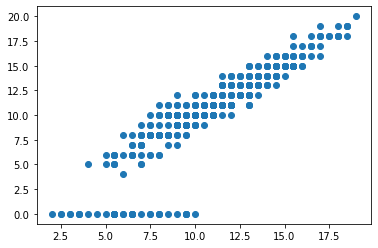

In [476]:
X= df['Mean']
Y= df['G3']

plt.scatter(X,Y)


In [117]:
df.avg of G1 & G2 again()

SyntaxError: invalid syntax (<ipython-input-117-1076dacf6ba4>, line 1)

In [977]:
 df.rename(columns = {'avg of G1 & G2 again': 'Mean'}, inplace = True)


In [978]:
df.head(10)

,school,sex,age,address,Medu,Fedu,studytime,failures,activities,nursery,higher,freetime,goout,health,absences,G1,G2,G3,Mean
0,GP,F,18.0,U,4,4,2,0,no,yes,yes,3,4,3,6,5,6,6,5.5
1,GP,F,17.0,U,1,1,2,0,no,no,yes,3,3,3,4,5,5,6,5.0
2,GP,F,15.0,U,1,1,2,3,no,yes,yes,3,2,3,10,7,8,10,7.5
3,GP,F,15.0,U,4,2,3,0,yes,yes,yes,2,2,5,2,15,14,15,14.5
4,GP,F,16.0,U,3,3,2,0,no,yes,yes,3,2,5,4,6,10,10,8.0
5,GP,M,16.0,U,4,3,2,0,yes,yes,yes,4,2,5,10,15,15,15,15.0
6,GP,M,16.0,U,2,2,2,0,no,yes,yes,4,4,3,0,12,12,11,12.0
7,GP,F,17.0,U,4,4,2,0,no,yes,yes,1,4,1,6,6,5,6,5.5
8,GP,M,15.0,U,3,2,2,0,no,yes,yes,2,2,1,0,16,18,19,17.0
9,GP,M,15.0,U,3,4,2,0,yes,yes,yes,5,1,5,0,14,15,15,14.5


In [132]:
df.Mean.min()
df.count()

school        395
sex           395
age           395
address       395
Medu          395
Fedu          395
studytime     395
failures      395
activities    395
nursery       395
higher        395
freetime      395
goout         395
health        395
absences      395
G1            395
G2            395
G3            395
Mean          395
dtype: int64

# CLOSED FORM SOLUTION NOW I AM APPROACHING:-
## WE WILL CREATE 395x2 MATRIX then assignimg X at the 0th column and 1(coeficient of constant term) at the 1st column position



In [137]:
n_points=395

X_dummied = np.zeros((n_points, 2))
X_dummied[:,1] = 1
X_dummied[:,0] = X 

In [138]:
m_disc, b_disc = np.linalg.inv(X_dummied.T@X_dummied)@(X_dummied.T@Y)

In [139]:
m_disc, b_disc

(1.1963479922036786, -2.5189977233058434)

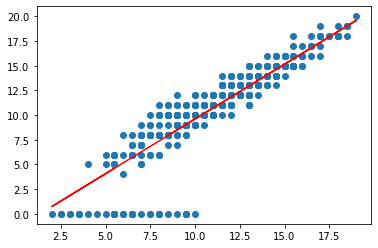

In [197]:
Yhat = m_disc*X + b_disc
plt.scatter(X, Y)
plt.plot(X, Yhat, color="red")
plt.show()

# GRADIENT DESCENT SOLUTION


In [219]:
learning_rate = 0.007
n_iters = 500

In [223]:
#m_disc, b_disc = np.random.uniform(low=-5, high=5, size=2)
costs = []

m,c=np.random.uniform(low=-5, high=5, size=2)

for i in range(n_iters): 
    Yhat = m*X + c  # The current predicted value of Y
    
    cost = np.mean((Y - Yhat)**2)
    costs.append(cost)
    
    D_m = (-2/n_points) * sum(X * (Y - Yhat))  # Derivative wrt m
    D_c = (-2/n_points) * sum(Y - Yhat)  # Derivative wrt c
    m = m - learning_rate * D_m  # Update m
    c = c - learning_rate * D_c  # Update c
    
print (m, c)





1.0763603190375097 -1.0942226805601525


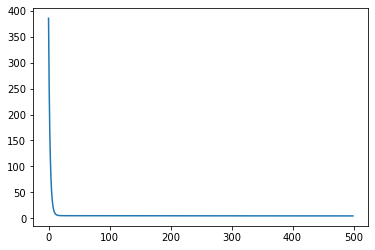

In [224]:
plt.plot(costs)

In [225]:
#m_disc

m

1.0763603190375097

In [226]:
#b_disc

c

-1.0942226805601525

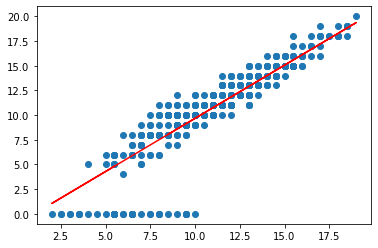

In [227]:
#Yhat=m_disc*X + b_disc
Yhat=m*X+c
plt.scatter(X,Y)

plt.plot(X,Yhat,color='red')

# NEWTON'S METHOD SOLUTION

In [244]:
n_iters=1000
m,c=np.random.uniform(low=-5, high=5, size=2)
costs=[]
for i in range(n_iters): 
    Yhat = m*X + c  # The current predicted value of Y
    
    cost = np.mean((Y - Yhat)**2)
    costs.append(cost)
    
    D_m = (-2/n_points) * sum(X * (Y - Yhat))  # Derivative wrt m
    D_c = (-2/n_points) * sum(Y - Yhat)  # Derivative wrt c
    
    D2_m= (2/n_points)*sum(X**2)      #double derivative wrt to m
    D2_c=(2/n_points)*sum(X)          # double derivative wrt to c
    
    
    m = m -  (D_m/D2_m)  # Update m
    c = c - ( D_c/D2_c)  # Update c
    
print (m, c)






1.1962100421183126 -2.5173711141903787


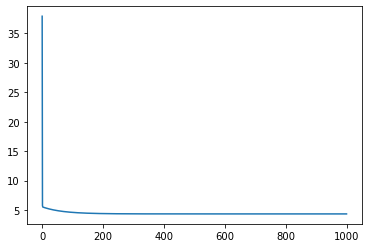

In [245]:
plt.plot(costs)

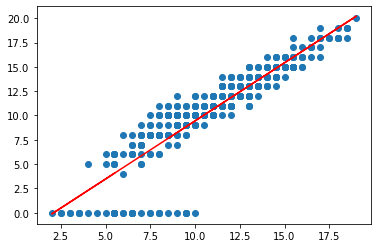

In [246]:
Yhat=m*X+c
plt.scatter(X,Y)

plt.plot(X,Yhat,color='red')




# MULTIVARIATE LINEAR REGRESSION:-



In [979]:
df.head()

,school,sex,age,address,Medu,Fedu,studytime,failures,activities,nursery,higher,freetime,goout,health,absences,G1,G2,G3,Mean
0,GP,F,18.0,U,4,4,2,0,no,yes,yes,3,4,3,6,5,6,6,5.5
1,GP,F,17.0,U,1,1,2,0,no,no,yes,3,3,3,4,5,5,6,5.0
2,GP,F,15.0,U,1,1,2,3,no,yes,yes,3,2,3,10,7,8,10,7.5
3,GP,F,15.0,U,4,2,3,0,yes,yes,yes,2,2,5,2,15,14,15,14.5
4,GP,F,16.0,U,3,3,2,0,no,yes,yes,3,2,5,4,6,10,10,8.0


In [980]:
df.isna().sum()

school        0
sex           0
age           0
address       0
Medu          0
Fedu          0
studytime     0
failures      0
activities    0
nursery       0
higher        0
freetime      0
goout         0
health        0
absences      0
G1            0
G2            0
G3            0
Mean          0
dtype: int64

In [981]:
(df=="?").sum()

school        0
sex           0
age           0
address       0
Medu          0
Fedu          0
studytime     0
failures      0
activities    0
nursery       0
higher        0
freetime      0
goout         0
health        0
absences      0
G1            0
G2            0
G3            0
Mean          0
dtype: int64

In [982]:
df["school"].unique()

array(['GP', 'MS'], dtype=object)

In [983]:
df.drop(axis= "columns",labels = "school",inplace= True)

In [984]:
df.drop(axis= "columns",labels = "sex",inplace= True)

In [985]:
df.drop(axis= "columns",labels = "address",inplace= True)

In [986]:
df.corr()

,age,Medu,Fedu,studytime,failures,freetime,goout,health,absences,G1,G2,G3,Mean
age,1.000000,-0.152649,-0.166807,-0.001676,0.238560,0.027058,0.116352,-0.083509,0.174466,-0.042011,-0.122977,-0.145641,-0.088338
Medu,-0.152649,1.000000,0.623455,0.064944,-0.236680,0.030891,0.064094,-0.046878,0.100285,0.205341,0.215527,0.217147,0.218970
Fedu,-0.166807,0.623455,1.000000,-0.009175,-0.250408,-0.012846,0.043105,0.014742,0.024473,0.190270,0.164893,0.152457,0.183683
studytime,-0.001676,0.064944,-0.009175,1.000000,-0.173563,-0.143198,-0.063904,-0.075616,-0.062700,0.160612,0.135880,0.097820,0.153224
failures,0.238560,-0.236680,-0.250408,-0.173563,1.000000,0.091987,0.124561,0.065827,0.063726,-0.354718,-0.355896,-0.360415,-0.369200
freetime,0.027058,0.030891,-0.012846,-0.143198,0.091987,1.000000,0.285019,0.075733,-0.058078,0.012613,-0.013777,0.011307,-0.001461
goout,0.116352,0.064094,0.043105,-0.063904,0.124561,0.285019,1.000000,-0.009577,0.044302,-0.149104,-0.162250,-0.132791,-0.162174
health,-0.083509,-0.046878,0.014742,-0.075616,0.065827,0.075733,-0.009577,1.000000,-0.029937,-0.073172,-0.097720,-0.061335,-0.089574
absences,0.174466,0.100285,0.024473,-0.062700,0.063726,-0.058078,0.044302,-0.029937,1.000000,-0.031003,-0.031777,0.034247,-0.032639
G1,-0.042011,0.205341,0.190270,0.160612,-0.354718,0.012613,-0.149104,-0.073172,-0.031003,1.000000,0.852118,0.801468,0.957371


In [987]:
df.head()

,age,Medu,Fedu,studytime,failures,activities,nursery,higher,freetime,goout,health,absences,G1,G2,G3,Mean
0,18.0,4,4,2,0,no,yes,yes,3,4,3,6,5,6,6,5.5
1,17.0,1,1,2,0,no,no,yes,3,3,3,4,5,5,6,5.0
2,15.0,1,1,2,3,no,yes,yes,3,2,3,10,7,8,10,7.5
3,15.0,4,2,3,0,yes,yes,yes,2,2,5,2,15,14,15,14.5
4,16.0,3,3,2,0,no,yes,yes,3,2,5,4,6,10,10,8.0


In [988]:
df.drop(axis= "columns",labels = "age",inplace= True)

In [989]:
df.drop(axis= "columns",labels = "failures",inplace= True)

In [990]:
df.drop(axis= "columns",labels = "activities",inplace= True)

In [991]:
df.drop(axis= "columns",labels = "nursery",inplace= True)

In [992]:
df.drop(axis= "columns",labels = "higher",inplace= True)

In [993]:
df.drop(axis= "columns",labels = "freetime",inplace= True)

In [994]:
df.drop(axis= "columns",labels = "goout",inplace= True)

In [995]:
df.drop(axis= "columns",labels = "health",inplace= True)

In [996]:
df.drop(axis= "columns",labels = "absences",inplace= True)

In [997]:
df.head()

,Medu,Fedu,studytime,G1,G2,G3,Mean
0,4,4,2,5,6,6,5.5
1,1,1,2,5,5,6,5.0
2,1,1,2,7,8,10,7.5
3,4,2,3,15,14,15,14.5
4,3,3,2,6,10,10,8.0


In [998]:
df.drop(axis= "columns",labels = "Mean",inplace= True)

In [999]:
df.head()

,Medu,Fedu,studytime,G1,G2,G3
0,4,4,2,5,6,6
1,1,1,2,5,5,6
2,1,1,2,7,8,10
3,4,2,3,15,14,15
4,3,3,2,6,10,10


In [1000]:
df = pd.concat([pd.Series(1, index=df.index, name='00'), df], axis=1)
df.head()


,00,Medu,Fedu,studytime,G1,G2,G3
0,1,4,4,2,5,6,6
1,1,1,1,2,5,5,6
2,1,1,1,2,7,8,10
3,1,4,2,3,15,14,15
4,1,3,3,2,6,10,10


In [318]:
#df.drop(axis= "columns",labels = "00",inplace= True)

In [826]:
df.head()

,00,Medu,Fedu,studytime,G1,G2,G3
0,1,4,4,2,5,6,6
1,1,1,1,2,5,5,6
2,1,1,1,2,7,8,10
3,1,4,2,3,15,14,15
4,1,3,3,2,6,10,10


In [1001]:
X = df.drop(columns="G3") # BIG X
y = df.iloc[:, 6]   # small y



#X=df.drop("G3",axis=1)
#y=pd.DataFrame()   ## creating new data frame
#y["G3"]=df["G3"]

In [919]:
X.head()

,00,Medu,Fedu,studytime,G1,G2
0,1,4,4,2,5,6
1,1,1,1,2,5,5
2,1,1,1,2,7,8
3,1,4,2,3,15,14
4,1,3,3,2,6,10


In [920]:
y


0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

In [921]:
import numpy as np
#np.array([0]*len(X.columns))

In [922]:
X.head()

,00,Medu,Fedu,studytime,G1,G2
0,1,4,4,2,5,6
1,1,1,1,2,5,5
2,1,1,1,2,7,8
3,1,4,2,3,15,14
4,1,3,3,2,6,10


In [923]:
len(X.columns)

6

In [1002]:
theta = np.array([0.0]*len(X.columns))

In [1003]:



y1 = theta*X
y1=np.sum(y1, axis=1)
y1

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
390    0.0
391    0.0
392    0.0
393    0.0
394    0.0
Length: 395, dtype: float64

In [1004]:


cost = sum(np.sqrt((y1-y)**2))/(2*len(df))
cost

5.207594936708861

In [1005]:
alpha=0.01
0-alpha*(sum((y1-y)*X.iloc[:,0])/395)

0.10415189873417723

In [837]:
len(df)

395

In [838]:
range(len(y))

range(0, 395)

In [745]:
print(type(X))
#X=X.to_numpy()
#y=y.to_numpy()

<class 'pandas.core.frame.DataFrame'>


In [746]:
import sys 
sys.maxsize

9223372036854775807

In [1006]:
def hypothesis(theta, X):
    return theta*X

In [1007]:
def computeCost(X, y, theta):      # DEFINING THE COST FUNCTION
    y1 = hypothesis(theta, X)
    y1=np.sum(y1, axis=1)
    return sum(np.sqrt((y1-y)**2))/(2*395)

In [1018]:
def gradientDescent(X, y, theta, alpha, i):
    float(alpha)
    J = []  #cost function in each iterations
    k = 0
    while k < i:        
        y1 = hypothesis(theta, X)
        y1 = np.sum(y1, axis=1)
        for c in range(0, len(X.columns)):
            s=sum((y1-y)*X.iloc[:,c]/len(X))
        
            theta[c] = theta[c] - alpha*s                                 #(sum((y1-y)*X.iloc[:,c])/len(X))
        j = computeCost(X, y, theta)
        J.append(j)
        k += 1
    return J, j, theta

In [1016]:
#c=0.01
#d=float(c)


J, j, theta = gradientDescent(X, y, theta,0.0001, 10000)


5.207594936708861

In [946]:
y_hat = hypothesis(theta, X)
y_hat = np.sum(y_hat, axis=1)

In [947]:
y_hat.head()

0   -2.117777e+227
1   -2.910539e+227
2   -2.748368e+227
3    3.108696e+227
4   -3.390470e+227
dtype: float64

In [905]:
y_hat =y_hat/10**225   #dividing by 10 raise to the power 

In [906]:
y_hat

0     -3.149403
1     -8.293952
2     -7.227273
3       9.74913
4      -4.87471
         ...   
390   -3.997912
391    4.320018
392   -5.986177
393    0.124515
394   -7.820569
Length: 395, dtype: object

In [635]:
X.size

2370

In [867]:
y

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

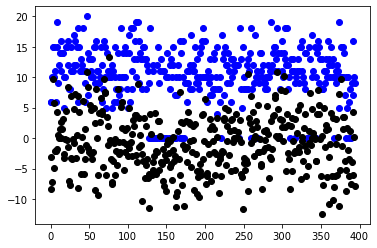

In [907]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x=list(range(0, 395)), y=y , color='blue')         
plt.scatter(x=list(range(0, 395)), y=y_hat, color='black')
plt.show()

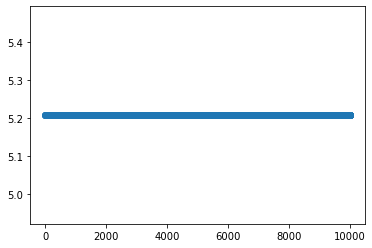

In [1019]:
plt.figure()
plt.scatter(x=list(range(0, 10000)), y=J)
plt.show()